In [1]:
import sys

In [2]:
sys.path.append('../')

In [3]:
from typing import List, Tuple
import os

In [4]:
from glob import glob
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [5]:
from retina_face_net.inference_wrapper import RetinaFaceNet, \
    RetinaFaceNetPrediction, BoundingBox, Point    

In [6]:
WEIGHTS_PATH = '/home/ppeczek/Pobrane/FaceNet_resnet_50.pth'

In [7]:
def draw_predictions(image: np.ndarray,
                     predictions: List[RetinaFaceNetPrediction]
                     ) -> np.ndarray:
    image = image.copy()
    for prediction in predictions:
        bbox = prediction.bbox
        cv.rectangle(
            img=image,
            pt1=bbox.left_top.compact_form,
            pt2=bbox.right_bottom.compact_form,
            color=(0, 255, 0),
            thickness=5
        )
    return image

In [8]:
model = RetinaFaceNet.initialize(
    weights_path=WEIGHTS_PATH
)

INFO:root:Loading pre-trained model from /home/ppeczek/Pobrane/FaceNet_resnet_50.pth
INFO:root:Missing keys:0
INFO:root:Unused checkpoint keys:0
INFO:root:Used keys:456


In [9]:
INPUT_PATH = '/home/ppeczek/Dokumenty/ModelAsAService/data/people_detection/6.jpg'

In [10]:
image = cv.imread(INPUT_PATH)

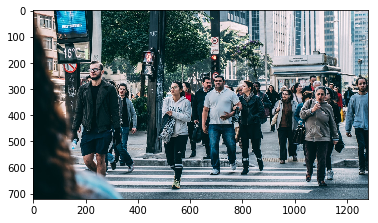

In [11]:
plt.imshow(image[:,:,::-1])

In [30]:
inference_results = model.infer(image=image)

In [31]:
output = draw_predictions(
    image=image,
    predictions=inference_results
)

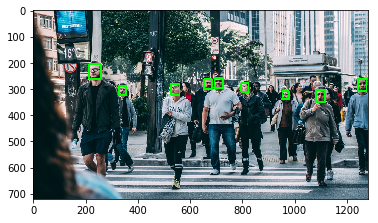

In [32]:
plt.imshow(output[:,:,::-1])

## Test with inference on people detection results

In [33]:
PEOPLE_DETECTION_DIR = '/home/ppeczek/Dokumenty/ModelAsAService/data/face_detection/75c6bad9-4870-44f0-870a-e955284e0169'

In [45]:
BatchPredictions = List[Tuple[np.ndarray, List[RetinaFaceNetPrediction]]]


def infer_on_dir_content(model: RetinaFaceNet,
                         dir_path: str
                         ) -> BatchPredictions:
    to_infer = glob(os.path.join(dir_path, "*.jpg"))
    to_infer = list(map(cv.imread, to_infer))
    inference_results = list(map(model.infer, tqdm(to_infer)))
    return list(zip(to_infer, inference_results))

In [46]:
batch_inference_results = infer_on_dir_content(
    model=model,
    dir_path=PEOPLE_DETECTION_DIR
)

100%|██████████| 15/15 [00:04<00:00,  3.47it/s]


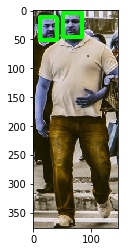

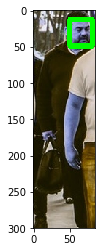

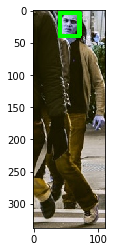

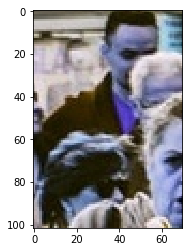

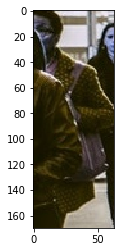

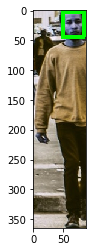

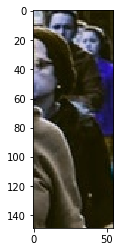

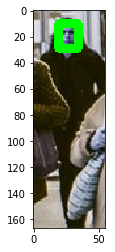

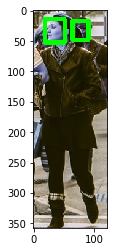

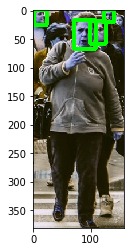

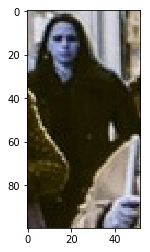

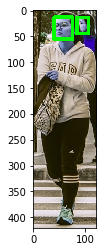

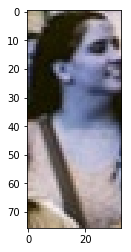

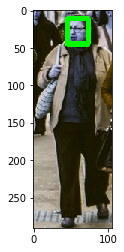

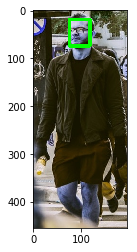

In [47]:
for image, predictions in batch_inference_results:
    to_show = draw_predictions(
        image=image,
        predictions=predictions
    )
    plt.imshow(to_show)
    plt.show()

## Image credits
* https://www.pexels.com/pl-pl/zdjecie/dziewczyna-grupa-grupowac-kobieta-708392/
* https://www.pexels.com/pl-pl/zdjecie/broda-grupa-grupowac-kobieta-708440/
* https://www.pexels.com/pl-pl/zdjecie/chlopak-czlowiek-dorosly-ludzie-220453/
* https://www.pexels.com/pl-pl/zdjecie/bikini-czas-wolny-grupa-grupowac-1427741/
* https://www.pexels.com/pl-pl/zdjecie/mezczyzna-ludzie-mezczyzni-skakanie-3446915/
* https://www.pexels.com/pl-pl/zdjecie/dziewczyny-klub-nocny-kobiety-ludzie-1449791/
* https://www.pexels.com/pl-pl/zdjecie/droga-ludzie-miasto-piesi-109919/
* https://www.pexels.com/pl-pl/zdjecie/dama-drogi-dzien-dziewczyna-1239291/
* https://www.pexels.com/pl-pl/zdjecie/drzewa-kobiety-kubki-las-745045/